In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data input
train = pd.read_csv("/Users/allen/Kaggle_py/Titanic/train.csv")
test = pd.read_csv("/Users/allen/Kaggle_py/Titanic/test.csv")
submit = pd.read_csv('/Users/allen/Kaggle_py/Titanic/gender_submission.csv')

In [3]:
#Data Exploration
train.info()
print("-----")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null

In [4]:
#Cabin has too much missing values
train = train.drop(columns = ["Cabin"])
test = test.drop(columns = ["Cabin"])

In [5]:
#Drop unrelated columns
train = train.drop(columns = "Ticket")
test = test.drop(columns = "Ticket")

train = train.drop(columns = "Name")
test = test.drop(columns = "Name")

In [6]:
train.info()
print("-----")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB
-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [7]:
#Data Exploration
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#Filling NAs
freq_train = train.Embarked.dropna().mode()[0]
freq_test = test.Embarked.dropna().mode()[0]
train["Embarked"] = train["Embarked"].fillna(freq_train)
test["Embarked"] = test["Embarked"].fillna(freq_test)

mean_fare = test["Fare"].notnull().mean()
test["Fare"] = test["Fare"].fillna(mean_fare)

#Using RFClassifier
from sklearn.ensemble import RandomForestRegressor

def finding_missing(df):
    age_df = df[["Age", "Pclass", "SibSp", "Parch", "Fare"]]
    unknown = age_df[age_df.Age.isnull()].as_matrix()
    known = age_df[age_df.Age.notnull()].as_matrix()
    
    y = known[:, 0]
    x = known[:, 1:]
    rf_age = RandomForestRegressor(random_state = 0, n_estimators = 2000, n_jobs = -1)
    rf_age.fit(x, y)
    
    predict_age = rf_age.predict(unknown[:, 1:])
    df.loc[(df.Age.isnull()), "Age"] = predict_age
    
    return df

In [10]:
train_df = train.drop(columns = "Survived")
combine = [train_df, test]
combine = pd.concat(combine)
combine = finding_missing(combine)

In [11]:
train["Age"] = combine["Age"][0:len(train.index)]
test["Age"] = combine["Age"][len(train.index):]
print(combine)
print(train)
print(test)

     PassengerId  Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0              1       3    male  22.000000      1      0    7.2500        S
1              2       1  female  38.000000      1      0   71.2833        C
2              3       3  female  26.000000      0      0    7.9250        S
3              4       1  female  35.000000      1      0   53.1000        S
4              5       3    male  35.000000      0      0    8.0500        S
5              6       3    male  23.671715      0      0    8.4583        Q
6              7       1    male  54.000000      0      0   51.8625        S
7              8       3    male   2.000000      3      1   21.0750        S
8              9       3  female  27.000000      0      2   11.1333        S
9             10       2  female  14.000000      1      0   30.0708        C
10            11       3  female   4.000000      1      1   16.7000        S
11            12       1  female  58.000000      0      0   26.5500        S

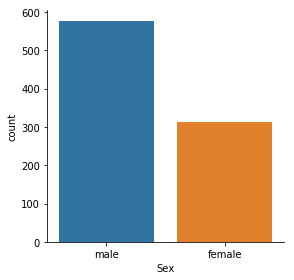

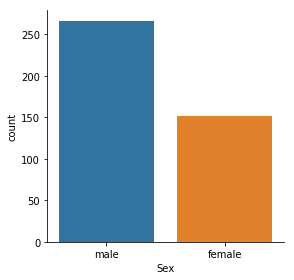

In [12]:
#Visualization
sns.factorplot("Sex", data = train, kind = "count")
sns.factorplot("Sex", data = test, kind = "count")

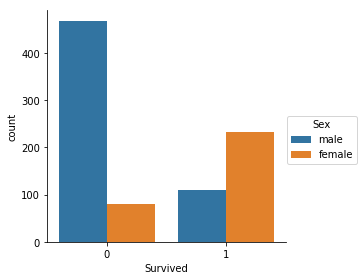

In [13]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Sex")

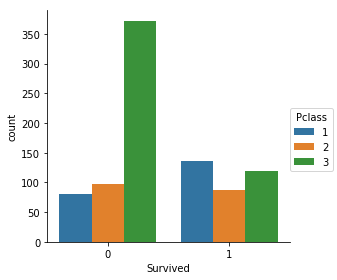

In [14]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Pclass")

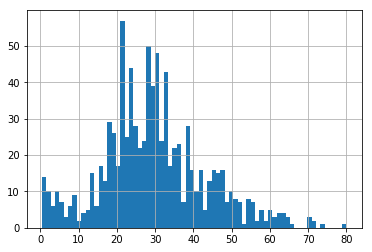

In [15]:
train["Age"].hist(bins = 70)

In [16]:
#Categorize Age
train.loc[train["Age"] <= 16, "Age"] = 0
train.loc[(train["Age"] > 16) & (train["Age"] <= 32), "Age"] = 1
train.loc[(train["Age"] > 32) & (train["Age"] <= 48), "Age"] = 2
train.loc[(train["Age"] > 48) & (train["Age"] <= 64), "Age"] = 3
train.loc[train["Age"] >= 64, "Age"] = 4

test.loc[test["Age"] <= 16, "Age"] = 0
test.loc[(test["Age"] > 16) & (test["Age"] <= 32), "Age"] = 1
test.loc[(test["Age"] > 32) & (test["Age"] <= 48), "Age"] = 2
test.loc[(test["Age"] > 48) & (test["Age"] <= 64), "Age"] = 3
test.loc[test["Age"] >= 64, "Age"] = 4

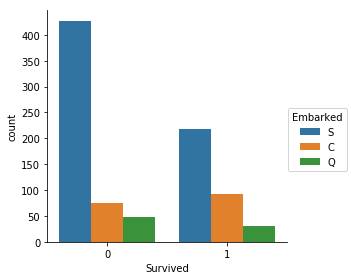

In [17]:
sns.factorplot("Survived", data = train, kind = "count", hue = "Embarked")

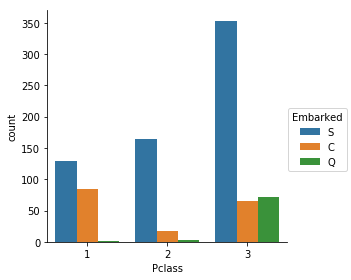

In [18]:
sns.factorplot("Pclass", data = train, kind = "count", hue = "Embarked")

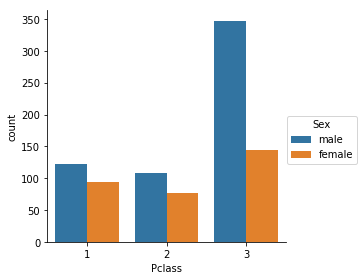

In [19]:
sns.factorplot("Pclass", data = train, kind = "count", hue = "Sex")

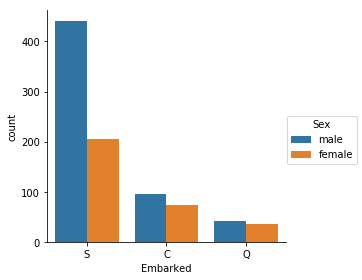

In [20]:
sns.factorplot("Embarked", data = train, kind = "count", hue = "Sex")

In [21]:
# Convert Sex into Numerical
train["Sex"] = train["Sex"].map({"female":0, "male":1}).astype(int)
test["Sex"] = test["Sex"].map({"female":0, "male":1}).astype(int)

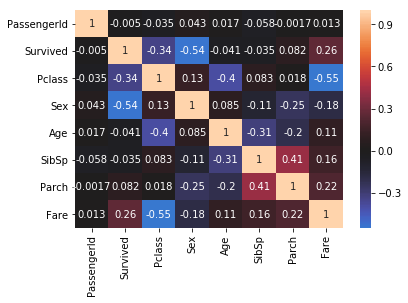

In [22]:
cormat = train.corr()
sns.heatmap(cormat, vmax = 1, annot = True, center = 0)

In [23]:
#Incorporate SibSp and Parch
train["IsAlone"] = 0
train["Family"] = train["SibSp"] + train["Parch"]
train = train.drop(columns = ["SibSp", "Parch"])
train.loc[train["Family"] == 0, "IsAlone"] = 1

test["IsAlone"] = 0
test["Family"] = test["SibSp"] + test["Parch"]
test = test.drop(columns = ["SibSp", "Parch"])
test.loc[test["Family"] == 0, "IsAlone"] = 1

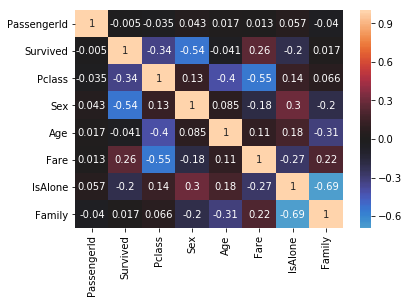

In [24]:
cormat = train.corr()
sns.heatmap(cormat, annot = True, center = 0)

In [25]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Family
0,1,0,3,1,1.0,7.2500,S,0,1
1,2,1,1,0,2.0,71.2833,C,0,1
2,3,1,3,0,1.0,7.9250,S,1,0
3,4,1,1,0,2.0,53.1000,S,0,1
4,5,0,3,1,2.0,8.0500,S,1,0
5,6,0,3,1,1.0,8.4583,Q,1,0
6,7,0,1,1,3.0,51.8625,S,1,0
7,8,0,3,1,0.0,21.0750,S,0,4
8,9,1,3,0,1.0,11.1333,S,0,2
9,10,1,2,0,0.0,30.0708,C,0,1


In [26]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Family
0,892,3,1,2.0,7.8292,Q,1,0
1,893,3,0,2.0,7.0000,S,0,1
2,894,2,1,3.0,9.6875,Q,1,0
3,895,3,1,1.0,8.6625,S,1,0
4,896,3,0,1.0,12.2875,S,0,2
5,897,3,1,0.0,9.2250,S,1,0
6,898,3,0,1.0,7.6292,Q,1,0
7,899,2,1,1.0,29.0000,S,0,2
8,900,3,0,1.0,7.2292,C,1,0
9,901,3,1,1.0,24.1500,S,0,2


In [27]:
train["Embarked"] = train["Embarked"].map({"S":1,"Q":2, "C":3}).astype(int)
test["Embarked"] = test["Embarked"].map({"S":1,"Q":2, "C":3}).astype(int)

In [28]:
#Deal with Fare?

In [29]:
# modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestClassifier(n_estimators = 1000,
                           oob_score = True)

train = train[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]
test = test[["Pclass", "Sex", "Age", "Fare", "Embarked", "IsAlone", "Family"]]

rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

rf_res =  rf.predict(test)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)

0.8036


In [30]:
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [31]:
submit.to_csv("/Users/allen/Kaggle_py/Titanic/sub_0923.csv", index = False)